In [1]:
import numpy as np
import pandas as pd
from time import time

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix   
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# predict the new document from the testing dataset
from sklearn.metrics import plot_confusion_matrix    
from sklearn.svm import SVC
from sklearn import svm
from sklearn.preprocessing import StandardScaler


import matplotlib.pyplot as plt 
import numpy
import seaborn as sns

# Loading pre-processed data 

In [3]:
data = pd.read_csv('cleaned_data.csv') # load cleaned data

# Devide data to test and training data

In [5]:
# mapping the sentiment as 0 for neg and 1 for positive
data['sentiment'] = data['sentiment'].map({'positive':1,'negative':0})

In [6]:

X_train, X_test, y_train, y_test = train_test_split(data['lemmatization'], data["sentiment"], train_size = 0.75)


# Prepare TF - IDF

In [7]:
tf_vectorizer = TfidfVectorizer(min_df=2) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf = tf_vectorizer.fit_transform(X_train) # run method fit_transform on training set
X_test_tf = tf_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_tf.shape)
print("n_samples: %d, n_features: %d" % X_test_tf.shape)

n_samples: 37186, n_features: 46156
n_samples: 12396, n_features: 46156


# Prepare TF - IDF with limited number of words

In [96]:
tf_vectorizer2 = TfidfVectorizer(min_df=5,  max_df=0.2 ) # create Object of class TfidfVectorizer
#, min_df=5, max_df=0.3
X_train_tf2 = tf_vectorizer2.fit_transform(X_train) # run method fit_transform on training set
X_test_tf2 = tf_vectorizer2.transform(X_test)
 
print("n_samples: %d, n_features: %d" % X_train_tf2.shape)
print("n_samples: %d, n_features: %d" % X_test_tf2.shape)

 

n_samples: 37186, n_features: 28287
n_samples: 12396, n_features: 28287


# Prepare Count Vectorizer

In [10]:
count_vectorizer = CountVectorizer() # or term frequency
X_train_cv = count_vectorizer.fit_transform(X_train)
X_test_cv = count_vectorizer.transform(X_test)
print("n_samples: %d, n_features: %d" % X_train_cv.shape)
print("n_samples: %d, n_features: %d" % X_test_cv.shape)

n_samples: 37186, n_features: 81271
n_samples: 12396, n_features: 81271


#  Naives Bayes

In [11]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_tf, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_tf)
 
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
print('------------------------------')

In [14]:
# FOR PRESENTATION
cm1=confusion_matrix(y_test, y_pred)

#Naives Bayes + Count Vector

In [15]:
naive_bayes_classifier = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier.fit(X_train_cv, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier.predict(X_test_cv)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print (cm)
print('------------------------------')
 
 
 

#Naives Bayes + TF-Idf limited 

In [59]:
naive_bayes_classifier2 = MultinomialNB() # create object naive_bayes_classifier
naive_bayes_classifier2.fit(X_train_tf2, y_train) # run method fit from the class MultinomialNB
y_pred = naive_bayes_classifier2.predict(X_test_tf2)

# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(metrics.confusion_matrix(y_test, y_pred))

print('------------------------------')
 

# Linear Support Vector Classification

In [ ]:
# LinearSVC + Tf IDF

In [41]:

    
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf, y_train)
y_pred = SVclassifier.predict(X_test_tf)
#result LinearSVC + Tf IDF
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
print(cm)
print('------------------------------')



In [ ]:
#FOR presentation 
cm2 = metrics.confusion_matrix(y_test, y_pred)


In [ ]:
#LinearSVC + Tf IDF limited

In [43]:
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_tf2, y_train)
y_pred = SVclassifier.predict(X_test_tf2)
#result LinearSVC + Tf IDF limited
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')



In [ ]:
# LinearSVC + Count Vect

In [46]:
SVclassifier = LinearSVC()
SVclassifier.fit(X_train_cv, y_train)
y_pred = SVclassifier.predict(X_test_cv)
# Linear Support Vector Classification
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')
 


C:\Users\CGosten\miniconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


# LogisticRegression

 

#LogisticRegression + TF - IDF

In [99]:
clf = LogisticRegression()
clf.fit(X_train_tf, y_train)
y_pred = clf.predict(X_test_tf)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

#LogisticRegression + TF - IDF  limited

In [101]:
clf = LogisticRegression()
clf.fit(X_train_tf2, y_train)
y_pred = clf.predict(X_test_tf2)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

#LogisticRegression + Count Vect

In [ ]:
clf = LogisticRegression()
clf.fit(X_train_cv, y_train)
y_pred = clf.predict(X_test_cv)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

#  SVC (Basic)


#SVC + Tf IDF

In [54]:
SVCclassifier = SVC()     
SVCclassifier.fit(X_train_tf, y_train)
y_pred = SVCclassifier.predict(X_test_tf)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')


#SVC + Tf IDF limited

In [ ]:
SVCclassifier = SVC()     
SVCclassifier.fit(X_train_tf2, y_train)
y_pred = SVCclassifier.predict(X_test_tf2)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')


#SVC + CV

In [ ]:
SVCclassifier = SVC()     
SVCclassifier.fit(X_train_cv, y_train)
y_pred = SVCclassifier.predict(X_test_cv)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')


#  SVM with the Radial Basis Function

In [ ]:
#Takes to much time, just for testing

In [ ]:
#SVM(rbf) + TD-IDF

In [49]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train_tf, y_train)
y_pred = rbf_svc.predict(X_test_tf)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

In [51]:
#SVM(rbf) + TD-IDF limited

accuracy:   0.890
              precision    recall  f1-score   support

    Positive       0.90      0.87      0.89      6184
    Negative       0.88      0.91      0.89      6212

    accuracy                           0.89     12396
   macro avg       0.89      0.89      0.89     12396
weighted avg       0.89      0.89      0.89     12396

confusion matrix:
[[5406  778]
 [ 583 5629]]
------------------------------


<AxesSubplot:>

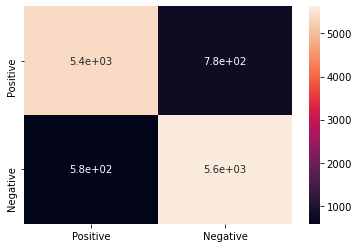

In [52]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train_tf2, y_train)
y_pred = rbf_svc.predict(X_test_tf2)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

In [ ]:
#SVM(rbf) + cv

In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X_train_cv, y_train)
y_pred = rbf_svc.predict(X_test_cv)
# compute the performance measures
score1 = metrics.accuracy_score(y_test, y_pred)
print("accuracy:   %0.3f" % score1)

print(metrics.classification_report(y_test, y_pred,
                                            target_names=['Positive', 'Negative']))

print("confusion matrix:")
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)

print('------------------------------')

# For presi


Text(0.5, 1.0, 'With SVCLinear Td-idf ')

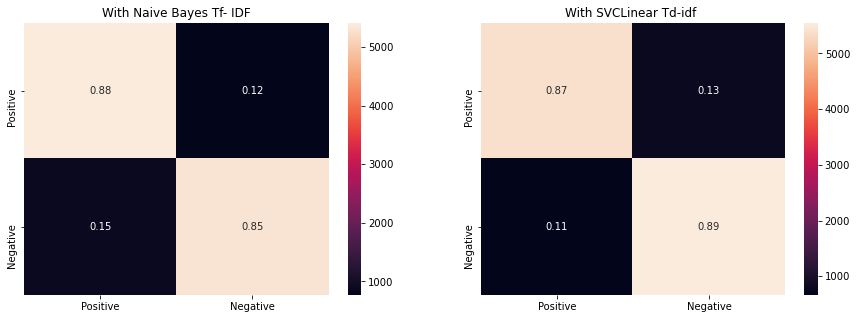

In [45]:
fig, axis = plt.subplots(1, 2, figsize=(15, 5))
x_axis_labels = ["Positive", "Negative"]
y_axis_labels = ["Positive", "Negative"]


C1 = cm1.astype('float') / cm1.sum(axis=1)[:, np.newaxis]
C2 = cm2.astype('float') / cm2.sum(axis=1)[:, np.newaxis]

sns.heatmap(ax = axis[0],data= cm1,annot=C1, xticklabels=x_axis_labels, yticklabels=y_axis_labels )
axis[0].set_title("With Naive Bayes Tf- IDF")

sns.heatmap(ax = axis[1],data=cm2,annot=C2,  xticklabels=x_axis_labels, yticklabels=y_axis_labels)
axis[1].set_title("With SVCLinear Td-idf ")




# KNeighborsClassifier

#KNeighborsClassifier  - TF IDF

In [23]:
# K von 1 bis 10 

In [24]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)


Minimum error:- 0.23289770893836723 at K = 8


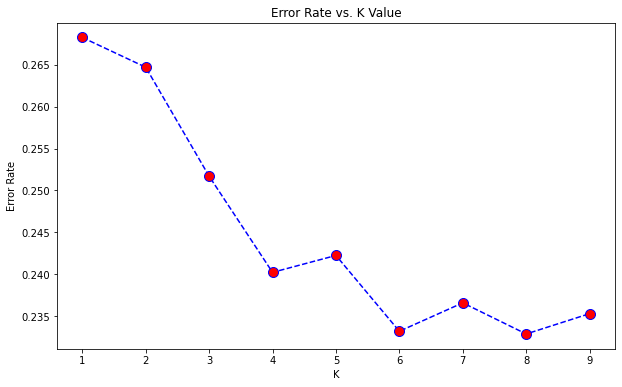

In [27]:
# K means 1-10 TF- IDF limited

In [66]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf2,y_train)
 pred_i = knn.predict(X_test_tf2)
 error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)



Minimum error:- 0.23668925459825751 at K = 6


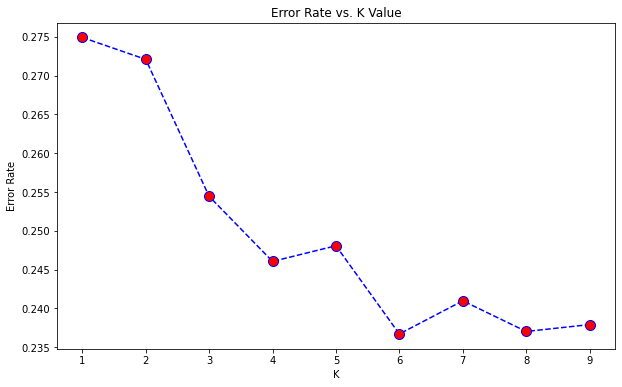

In [30]:
# K means 1-10 CV 

In [63]:
error_rate = []
minR = 1 
maxR = 10
for i in range(minR, maxR):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_cv,y_train)
 pred_i = knn.predict(X_test_cv)
 error_rate.append(np.mean(pred_i != y_test))


plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)



Minimum error:- 0.34551468215553405 at K = 9


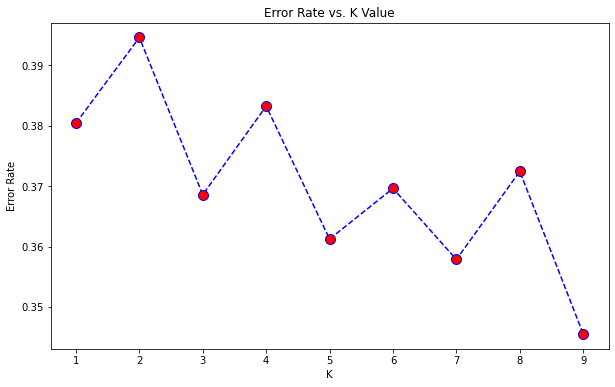

# K means from 10 till 100 

In [34]:
error_rate = []
minR = 10 
maxR = 100
for i in range(10, 100, 10):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.21200387221684414 at K = 7


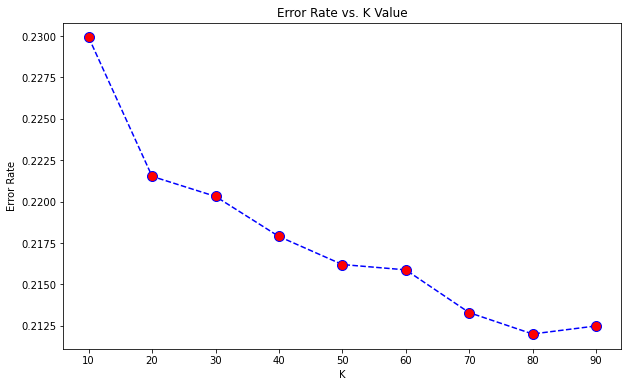

In [35]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 10)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate))


# K Means from 100 to 1000

In [36]:
error_rate = []
minR = 100 
maxR = 10000
for i in range(100, 10000, 1000):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(X_train_tf,y_train)
 pred_i = knn.predict(X_test_tf)
 error_rate.append(np.mean(pred_i != y_test))


Minimum error:- 0.17408841561794128 at K = 3


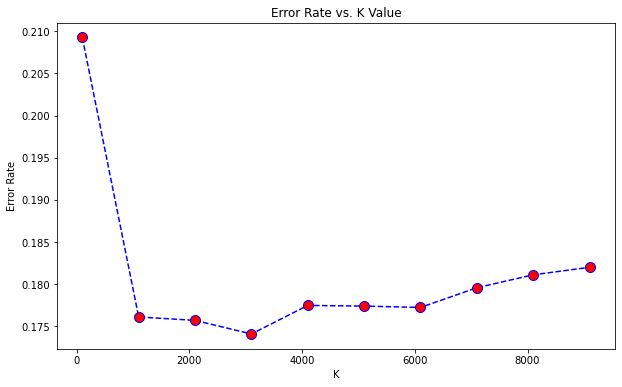

In [37]:

plt.figure(figsize=(10,6))
plt.plot(np.array(range(minR, maxR, 1000)), np.array(error_rate),color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
print("Minimum error:-",numpy.min(error_rate),"at K =",error_rate.index(numpy.min(error_rate))+1)
